# Section 1: Multiple Regression

A healthcare non-profit is interested in understanding the impact of statewide demographic information and cigarette prices on cigarette sales. They feel that if any of these factors are significantly related to cigarette sales, it will help them figure out which areas should be targeted with anti-smoking messaging. They provided you with the cigarette_sales.csv dataset. Information about this data is in the table below.

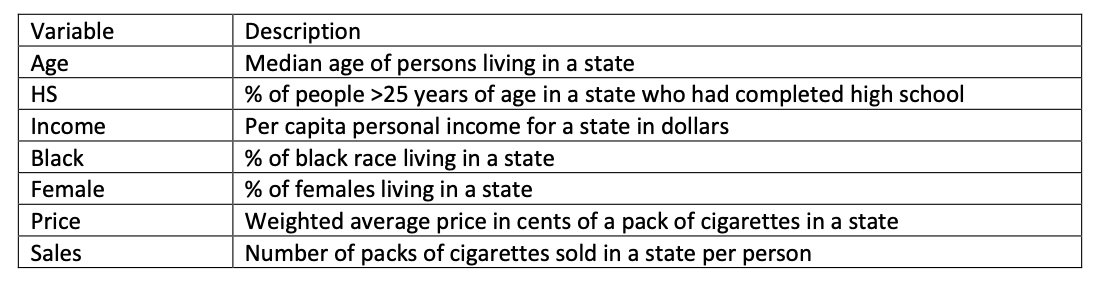

This link will be helpful for doing this analysis. However, as this is multiple regression, you will need to make sure the X array contains all the predictor variables.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
import numpy as np

In [12]:
df = pd.read_csv('cigarette_sales.csv')
print(df.head())

    Age    HS  Income  Black  Female  Price  Sales
0  27.0  41.3    2948   26.2    51.7   42.7   89.8
1  22.9  66.7    4644    3.0    45.7   41.8  121.3
2  26.3  58.1    3665    3.0    50.8   38.5  115.2
3  29.1  39.9    2878   18.3    51.5   38.8  100.3
4  28.1  62.6    4493    7.0    50.8   39.7  123.0


**1) Answer the following:**

**a) What is the outcome?**

In [28]:
X = df[['Age', 'HS', 'Income', 'Black', 'Female', 'Price']]
y = df['Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Thu, 28 Sep 2023   Prob (F-statistic):            0.00686
Time:                        19:13:05   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.6

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**b) What are the predictors they want to understand the impact of?**

From the summary above, we can find out that 'Age' has the most positive impact on the sales of cigarettes, while 'Price' has the most negative impact. Also, the category of gender has a some kinds of negative impact as well.

**c) What is the hypothesis?**

The hypothesis is like: with the growth of age, the sales of cigarettes will increase significantly, and when prices are lower, the sales of cigatettes will increase as well. The proportion of females living in the state may involve a little bit, as higher the percentage of female living in the state, the sales of cigarettes will be lower.

**2) Exploratory data analysis**

**a) Look at a few rows of the data to understand how it is structured.**

In [23]:
print(df.head())

    Age    HS  Income  Black  Female  Price  Sales
0  27.0  41.3    2948   26.2    51.7   42.7   89.8
1  22.9  66.7    4644    3.0    45.7   41.8  121.3
2  26.3  58.1    3665    3.0    50.8   38.5  115.2
3  29.1  39.9    2878   18.3    51.5   38.8  100.3
4  28.1  62.6    4493    7.0    50.8   39.7  123.0


**b) Generate some summary statistics using describe().**

In [17]:
print(df.describe())

             Age         HS       Income      Black     Female      Price  \
count  51.000000  51.000000    51.000000  51.000000  51.000000  51.000000   
mean   27.466667  53.149020  3763.705882   9.992157  50.950980  38.074510   
std     1.876983   8.001184   594.715639  12.648318   1.111463   4.128576   
min    22.900000  37.800000  2626.000000   0.200000  45.700000  29.000000   
25%    26.400000  48.300000  3271.000000   1.600000  50.750000  34.700000   
50%    27.400000  53.300000  3751.000000   6.000000  51.100000  38.900000   
75%    28.750000  59.100000  4116.500000  13.550000  51.500000  41.350000   
max    32.300000  67.300000  5079.000000  71.100000  53.500000  45.500000   

            Sales  
count   51.000000  
mean   121.541176  
std     32.070374  
min     65.500000  
25%    105.350000  
50%    119.000000  
75%    124.550000  
max    265.700000  


**c) Look at the distributions and scatterplots of the data. A convenient function for doing this is *pairplot()* in *Seaborn.***

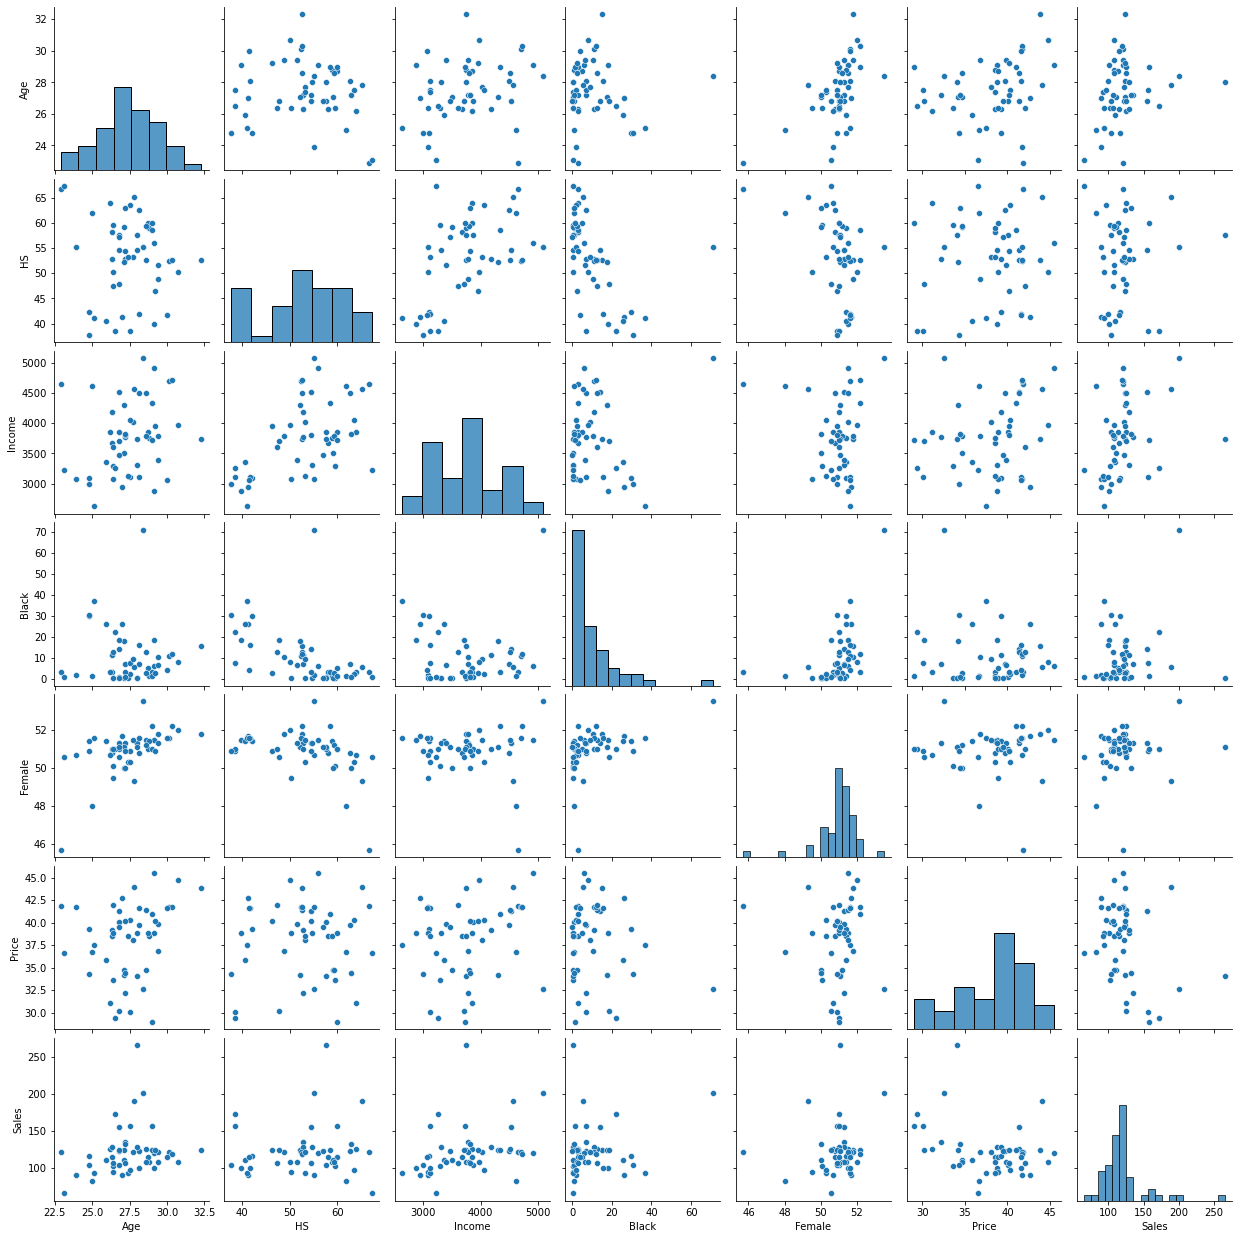

In [22]:
sns.pairplot(df)

**d) Do any of these variables look like they might violate the normality regression assumption or be correlated with other variables? Explain.**

'Black' and 'Female' violate the normality regression assumption since they are screwed. There seems to be on any variables correlated with others.

**e) Generate a plot to check if there are outliers in the outcome. What do you see?**

<AxesSubplot:>

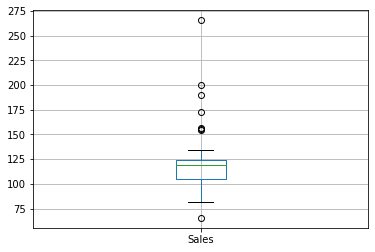

In [24]:
df.boxplot(column = ['Sales'])

There are several outliers in the outcome for sales of cigarettes, which means there are some extreme values that may affect the analysis.

**3) Multiple regression**

**a) Conduct a multiple regression analysis.**

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)
print(regr.intercept_)

[ 0.          4.52045242 -0.06158605  0.01894645  0.35753517 -1.05285886
 -3.25491843]
103.34484572533957


**b) Are any of the variables significant?**

'Age' and 'Price' are quite significant for this regression.

**c) Interpret the intercept and any statistically significant coefficients (i.e. what is their meaning in relation to sales?)**

The coefficients of 'Age' and 'Price' mean that 'Age' has a positive relation with 'Sales' while 'Price' has a negative one. The intercept is the mean of response when all explantional variables equal to 0. Actually, it does not make any sense for all variables equal to 0 but having a sale around 100, so the intercept here in this model is maybe just a parameter. 

# Section 2: Detecting Assumption Violations

Using the same data set and regression results from the prior section, do the following:

**1) Collinearity**

**a) Compute the VIF for each covariate and explain what the results mean. Use this link.**

In [34]:
y, X = dmatrices('Sales ~ Age + HS + Income + Black + Female + Price', data = df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

           VIF   variable
0  3875.756869  Intercept
1     2.300617        Age
2     2.676465         HS
3     2.325164     Income
4     2.392152      Black
5     2.406417     Female
6     1.142181      Price


We know for a vif value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention. Therefore, all the variables in the model follows this explanation.

**b) Compute all the pairwise correlations between the variables. This link shows 3 ways to do this. Just use *corr().***

In [37]:
df.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


**c) Remove the 3 variables with the highest p-values. Refit the model. How have the p-values for the other variables changed? Did R2 change by much?**

In [41]:
X_1 = df[['Age', 'Income', 'Price']]
y_1 = df['Sales']

X_1 = sm.add_constant(X_1)
model_1 = sm.OLS(y_1, X_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           0.000657
Time:                        20:08:46   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2482     61.933      1.037      0.3

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**2) Model Fit**

**a) What does R2 tell you about the fit of the second model?**

In general, the larger the R-squared value of a regression model the better the explanatory variables are able to predict the value of the response variable.

**b) As noted in the video on MLE, AIC is another measure of fit. Which model has the lowest AIC value (lowest is best)?**

In [ ]:
The second model has a lower AIC value.

**3) Outliers**

**a) Do a leverage plot. Are there influential outliers? Again, this resource is helpful.**

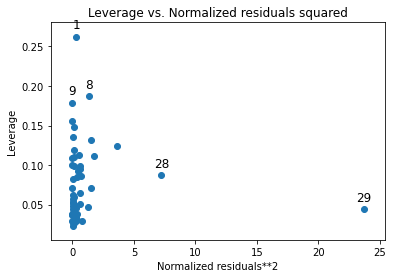

In [43]:
leverage = model_1.get_influence().hat_matrix_diag

plot_leverage_resid2(model_1)
plt.show()

**4) Linearity & constant variance**

**a) Generate a predicted vs standardized residual plot. The resid_studentized_internal in statsmodels are the standardized residuals. The link above shows how to obtain them. Does the data meet the linearity assumption?**

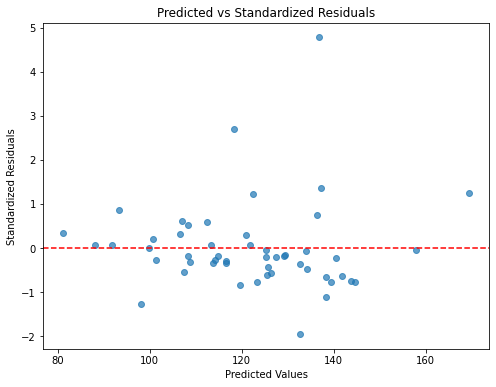

In [46]:
influence = OLSInfluence(model_1)
standardized_residuals = influence.resid_studentized_internal

predicted_values = model_1.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, standardized_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Predicted vs Standardized Residuals')
plt.show()

I do not think the data meet the linearity assumption.

**5) Normality**

**a) Do a Q-Q Plot of the residuals. Are the residuals normally distributed?**

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


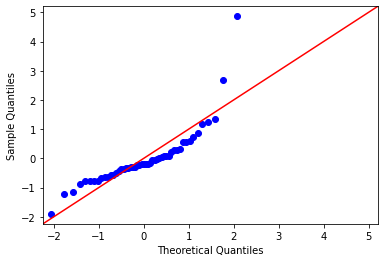

In [48]:
res = model_1.resid

fig = sm.qqplot(res, fit = True, line = "45")
plt.show() 

Yes, I think the residuals are normally distributed.